In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [235]:
# load preprocessed train dataset
df_train = pd.read_csv('titanic_train_preprocessed2.csv')

# create matrix of the features (X) and target (y)
X = df_train.drop('Survived',axis=1) # values used for prediction
y = df_train['Survived'] # values to be predicted

# split data from "titanic_train_preprocessed.csv" to training data (75%) and testing data (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [236]:
# Create a random forest classifier
rfc_best = RandomForestClassifier(criterion='gini',n_estimators=100,max_depth=9,min_samples_split=10,min_samples_leaf=1,
                                       max_features=9 ,oob_score=True,random_state=42,n_jobs=-1,verbose=1)

# fit classifier to the training data
rfc.fit(X_train.values,y_train)

RandomForestClassifier(max_features='log2', n_jobs=-1, oob_score=True,
                       random_state=1)

In [237]:
# Make predictions on the test set
y_pred = rfc.predict(X_test.values)

In [238]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8071748878923767


In [239]:
# once happy with the model accuracy, fit it on all data
rfc.fit(X.values,y)

RandomForestClassifier(max_features='log2', n_jobs=-1, oob_score=True,
                       random_state=1)

In [240]:
X_pred = pd.read_csv('titanic_test_preprocessed2.csv')
X_pred.replace([np.inf, -np.inf], np.nan, inplace=True) # becaouse of error NaN/inf
X_pred.fillna(999, inplace=True) # becaouse of error NaN/inf
X_pred.head()

,Age,SibSp,Parch,Fare,Relatives,Age_Class,Female,Male,Master,Miss,Mr,Mrs,Class 1,Class 2,Class 3,EmbarkC,EmbarkQ,EmbarkS
0,0.452723,0.000,0.000000,0.015282,0.0,0.569037,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.617566,0.125,0.000000,0.013663,0.1,0.776231,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.815377,0.000,0.000000,0.018909,0.0,0.682303,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.353818,0.000,0.000000,0.016908,0.0,0.444721,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.287881,0.125,0.111111,0.023984,0.2,0.361843,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [241]:
X_pred_convert = np.nan_to_num(X_pred) # conversion, otherwise y_pred throws an error

In [242]:
# and do prediction with all data available
y_pred = rfc.predict(X_pred_convert)


In [243]:
# convert numpy ndarray back to dataframe
predicted_data = pd.DataFrame(y_pred)

# append the predicted data to final file
df_test = pd.read_csv('titanic_test_data.csv')
df_test = pd.concat([df_test,predicted_data],axis=1) # append predicted y
df_test = df_test.rename(columns = {0:'Survived'}) # rename added column
df_test = df_test[['PassengerId', 'Survived']] # leave only requested columns for submit
df_test.head() # check if correct

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [244]:
# save result
df_test.to_csv('submission.csv', index=False)

In [245]:
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.71111111 0.83146067 0.75280899 0.83146067 0.86516854 0.85393258
 0.82022472 0.75280899 0.84269663 0.86516854]
Mean: 0.8126841448189763
Standard Deviation: 0.0513425091717057


In [246]:
# check relevance of features
rfc.fit(X.values,y)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Fare,0.196
Age_Class,0.150
Age,0.129
Mr,0.114
Male,0.087
Female,0.079
Relatives,0.049
Class 3,0.044
SibSp,0.028


<Axes: xlabel='feature'>

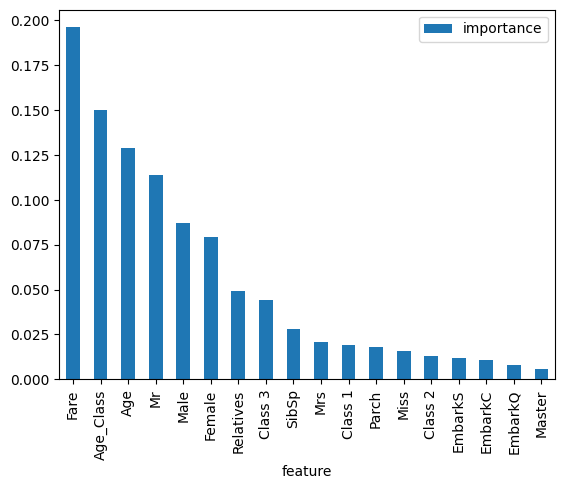

In [247]:
importances.plot.bar()